## Assignment : 02
### sub: ML

> Kanaka Amin

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
df = pd.read_csv(r"D:\BE\ML\Lab\Datasets\uber.csv")

In [50]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [52]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
#pickup date time conversion
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

#extracting hours, day, month and year
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month  
df['year'] = df['pickup_datetime'].dt.year 

In [55]:
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

In [56]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014


In [59]:
# function to calculate the travel distance from the longitudes and latitudes
from math import *
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
            
    return  travel_dist

df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

In [60]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,4.475450


## Identify outliers 

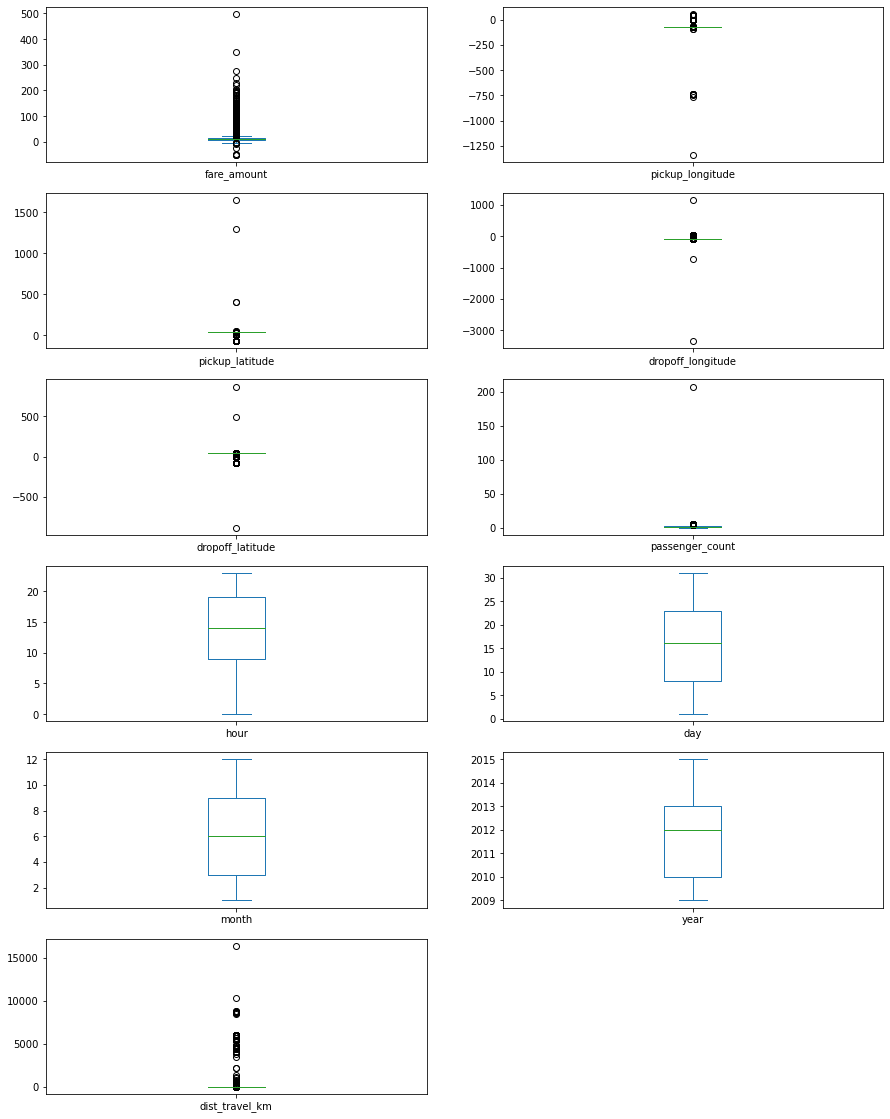

In [67]:
df.plot(kind='box', subplots=True, layout=(6,2), figsize=(15, 20))
plt.show()

In [68]:
# removing outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker, upper_whisker = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers(df, col_list):
    for col in col_list:
        remove_outliers(df, col)
    return df

df = treat_outliers(df, ['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_travel_km'])

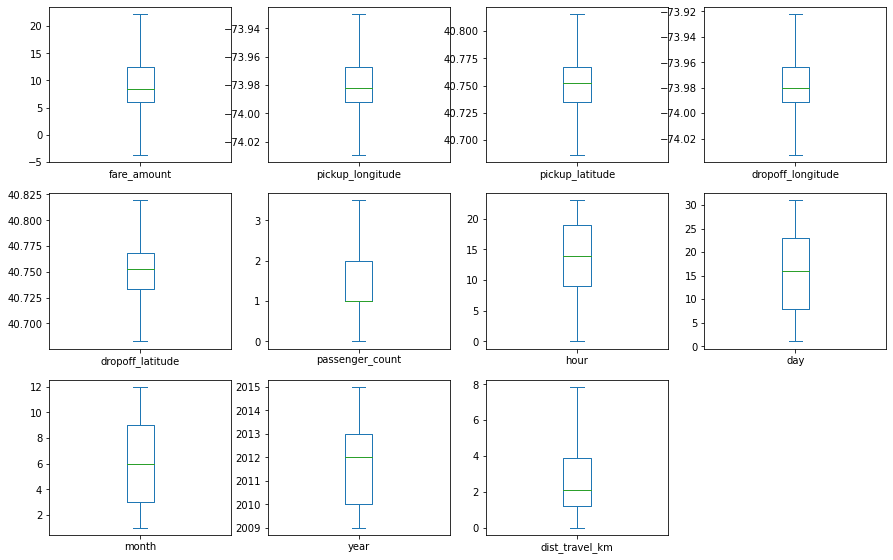

In [69]:
df.plot(kind='box', subplots=True, layout=(6,4), figsize=(15, 20))
plt.show()

## Data free from outliers

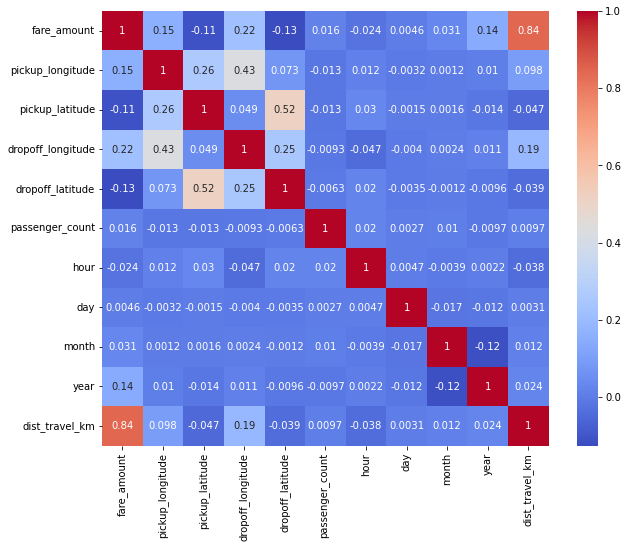

In [74]:
#correlation
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [75]:
X = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'hour','day','month','year' ,'dist_travel_km']]
y = df['fare_amount']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
#model initialization, training and prediction
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)  
y_pred_lasso = lasso_model.predict(X_test)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)  
y_pred_ridge = ridge_model.predict(X_test)  

In [81]:
#Evaluation
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

ridge_r2 = r2_score(y_test, y_pred_ridge)  
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))  
  
lasso_r2 = r2_score(y_test, y_pred_lasso)  
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso)) 

In [82]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge'],
    'R2 Score': [lr_r2, lasso_r2 ,ridge_r2],
    'RMSE': [lr_rmse, lasso_rmse, ridge_rmse]
})

print('-- Results of the models are ---')
results.head()

-- Results of the models are ---


,Model,R2 Score,RMSE
0,Linear Regression,0.734230,2.807859
1,Lasso,0.713989,2.912819
2,Ridge,0.734230,2.807860


## Better conditions: 
* Lower RMSE Scores
* Higher R2 Scores (0,1)